In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [94]:
Hr = pd.read_csv("G:/sem3/HR analytics/attrition.csv")

In [95]:
Hr.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [96]:
Hr.describe()

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,1.233300e+04,9614.000000,12333.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000
mean,2.872888e+06,21.189619,37.943323,41.837663,37.772016,-2.078916,4.160788,30.232304
std,5.099726e+05,26.410351,24.526587,29.435844,35.593317,19.997159,2.810108,4.178853
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000
25%,2.378256e+06,2.000000,30.000000,25.000000,20.000000,-9.090000,3.000000,27.000000
50%,2.820675e+06,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000
75%,3.338197e+06,32.000000,60.000000,52.170000,47.060000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000


In [97]:
Hr.shape

(12333, 17)

In [98]:
hr = Hr.dropna()
hr.shape

(9011, 17)


# Data exploration


In [131]:
clean = {"Status": {"Joined": 0, "Not Joined": 1}}

hr.replace(clean, inplace = True)
hr['Status']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
8        0
10       0
11       0
12       1
13       0
14       1
15       1
16       1
17       0
18       1
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
30       1
31       0
        ..
12231    0
12235    0
12238    0
12240    0
12242    0
12243    0
12244    0
12245    0
12246    0
12250    0
12252    0
12253    0
12265    0
12270    1
12279    0
12284    0
12285    0
12288    0
12289    0
12290    0
12293    0
12294    0
12303    0
12304    0
12308    1
12318    0
12326    0
12330    0
12331    0
12332    0
Name: Status, Length: 9011, dtype: int64

In [132]:
hr['Status'].value_counts()

0    7326
1    1685
Name: Status, dtype: int64

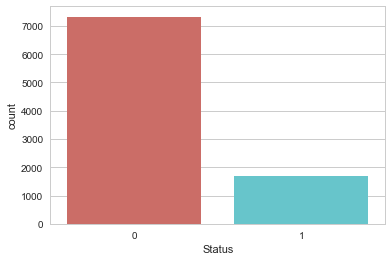

In [133]:
sns.countplot(x="Status", data = hr, palette = 'hls')
plt.show()

In [136]:
count_notjoined = len(hr[hr['Status']==1])
count_joined = len(hr[hr['Status'] == 0])

percent_notjoined = (count_notjoined / (count_joined + count_notjoined))*100
print("percentage of not joined is", percent_notjoined)

percent_joined = count_joined / (count_joined + count_notjoined)
print("perrcentage of joined is", percent_joined*100)


percentage of not joined is 18.699367439795804
perrcentage of joined is 81.3006325602042


Our data is imbalance,the ratio of joined to not joined is 81:18. so, we need to balance the data.

In [137]:
table= pd.crosstab(hr.DOJ Extended,hr.Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of DOJ extended vs Status')
plt.xlabel('DOJ extendedd')
plt.ylabel('Status of joining')
#plt.savefig('mariral_vs_pur_stack')

SyntaxError: invalid syntax (<ipython-input-137-de4e7b313441>, line 1)

# Creating dummy variables 

In [138]:
cat_vars = ['DOJ Extended', 'Offered band', 'Joining Bonus','Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 
            'Location']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    data1=hr.join(cat_list)
    hr=data1
    
cat_vars = ['DOJ Extended', 'Offered band', 'Joining Bonus','Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 
            'Location']
data_vars=hr.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]



ValueError: columns overlap but no suffix specified: Index(['DOJ Extended_No', 'DOJ Extended_Yes'], dtype='object')

In [139]:
data_final=hr[to_keep]
data_final.columns.values

array(['Candidate Ref', 'Duration to accept offer', 'Notice period',
       'Pecent hike expected in CTC', 'Percent hike offered in CTC',
       'Percent difference CTC', 'Rex in Yrs', 'Age', 'Status',
       'DOJ Extended_No', 'DOJ Extended_Yes', 'Offered band_E0',
       'Offered band_E1', 'Offered band_E2', 'Offered band_E3',
       'Joining Bonus_No', 'Joining Bonus_Yes',
       'Candidate relocate actual_No', 'Candidate relocate actual_Yes',
       'Gender_Female', 'Gender_Male', 'Candidate Source_Agency',
       'Candidate Source_Direct', 'Candidate Source_Employee Referral',
       'LOB_AXON', 'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS',
       'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'], dtype=object)

above columns are our final dataset columns. we are going to work on these variables now.

# over sampling the data

In [140]:
X = data_final.loc[:, data_final.columns != 'Status']
y = data_final.loc[:, data_final.columns == 'Status']

#importing the SMOTE liberary
!pip install imblearn  #if imblearn don't work run this
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

#spliting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['Status'])



Invalid requirement: '#if'
Traceback (most recent call last):
  File "c:\users\kranthi\anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "c:\users\kranthi\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1654, in parseString
    raise exc
  File "c:\users\kranthi\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1644, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "c:\users\kranthi\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1402, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\users\kranthi\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3417, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "c:\users\kranthi\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1402, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActi

In [142]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of not joined in oversampled data",len(os_data_y[os_data_y['Status']== 1]))
print("Number of joined",len(os_data_y[os_data_y['Status']== 0]))
print("Proportion of not joineddata in oversampled data is ",len(os_data_y[os_data_y['Status']== 1])/len(os_data_X))
print("Proportion of joined data in oversampled data is ",len(os_data_y[os_data_y['Status']== 0])/len(os_data_X))

length of oversampled data is  10208
Number of not joined in oversampled data 5104
Number of joined 5104
Proportion of not joineddata in oversampled data is  0.5
Proportion of joined data in oversampled data is  0.5


### Now our data is perfectly balanced. I have over sampled only the training data.


# importance of features

In [143]:
#importing liberaries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [145]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X ,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features


ValueError: Input X must be non-negative.

In [146]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features


                          Specs       Score
0                     LOB_INFRA  185.851748
1                Location_Noida  123.545485
2  Candidate relocate actual_No   90.713025
3                       LOB_ERS   30.506780
4              Location_Chennai   29.538101
5               Location_Mumbai   25.797189
6               Offered band_E3   20.119473
7                       LOB_ETS   13.306710
8                       LOB_MMS    9.000000
9               Offered band_E2    7.584177


The above are the top ten variables and there scores. By using  Univariate Selection, which is a Statistical tests can be used to select those features that have the strongest relationship with the output variable i got those variables.

In [147]:
cols=['LOB_INFRA', 'Location_Noida', 'Candidate relocate actual_No', 'LOB_ERS', 'Location_Chennai','Location_Mumbai',
        'Offered band_E3','LOB_ETS','LOB_MMS', 'Offered band_E2']
X=os_data_X[cols]
y=os_data_y['Status']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 758  743]
 [ 359 1203]]


In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.68      0.50      0.58      1501
          1       0.62      0.77      0.69      1562

avg / total       0.65      0.64      0.63      3063



Interpretation: 65% of the people who got offer letter prefered to jjoin the companey.

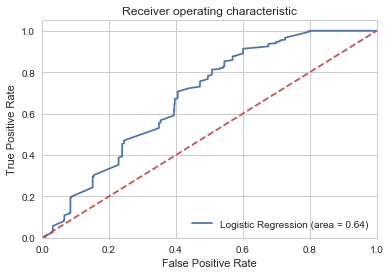

In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()